# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

In [1]:
# Импортируем необходимые модули
import numpy as np
import itertools
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
### Для будущих задач определим функцию, которая будет заполнять множество 
### возможных исходов на основе заданных нами элементарных исходов

def fill_omega(outcomes, dim):
    omega = list(itertools.product(outcomes, repeat = dim))
    inter_omega = ''
    full_omega = []
    for x in omega:
        for i in range(dim):
            inter_omega += (x[i])
        full_omega.append(inter_omega)
        inter_omega = ''
    return full_omega

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [3]:
### У броска одной правильной монеты может быть два исхода: орёл (H) или решка (T)
## Бросаем две монеты одновременно
%timeit
outcomes = ['T','H'] # исходы броска 1 монеты
omega = fill_omega(outcomes, 2)
elem_probabilities = [omega.count(x)/len(omega) for x in omega] # считаем вероятности на основе множества элементарных событий

### Аналитически
mask = (omega == 'HT') | (omega == 'TH') # создаём фильтр для благоприятных событий
prob_1_diff = len(omega[mask])/len(omega)
print('Аналитическая вероятность выпадения разных сторон у двух монет: %1.2f' %(prob_1_diff))


### Из выборки
sample = np.random.choice(omega,10000,p=elem_probabilities) # генерируем выборку
mask = (sample == 'HT') | (sample == 'TH') # создаём фильтр для благоприятных событий
prob_2_diff = len(sample[mask])/sample.shape[0] # считаем вероятность
print('Выбоорочная вероятность выпадения разных сторон у двух монет на %s наблюдениях: %1.2f' % (len(sample),prob_2_diff))



Аналитическая вероятность выпадения разных сторон у двух монет: 0.50
Выбоорочная вероятность выпадения разных сторон у двух монет на 10000 наблюдениях: 0.50


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [4]:
### Создадим множество элементарных событий
### В терминах нашей функции: есть всего два элементарных исхода (H/T) и размерность == 3
### Причём решение будет симметрично для H и T, как бы мы не соотносили их с гербами и не-гербами
outcomes = ['H','T']
omega = fill_omega(outcomes,3)
elem_probabilities = [omega.count(x)/len(omega) for x in omega] # считаем вероятности на основе множества элементарных событий

### Пункт А - ни одного герба
outcomes_A = [x for x in omega if x.count('T') == 0]
prob_A = len(outcomes_A)/len(omega)
print('Вероятность получить ни одного герба: %1.2f' %(prob_A))

### Пункт B: чётное количество гербов
### Чётное это либо 0, либо 2
outcomes_B = [x for x in omega if (x.count('T')//2==0)]
prob_B = len(outcomes_B)/len(omega)
print('Вероятность получить чётное количество гербов: %1.2f' %(prob_B))

### Пункт C: на третьей монете герб
outcomes_C = [x for x in omega if (x[2]=='T')]
prob_C = len(outcomes_C)/len(omega)
print('Вероятность получить герб на третьей монете: %1.2f' %(prob_C))

Вероятность получить ни одного герба: 0.12
Вероятность получить чётное количество гербов: 0.50
Вероятность получить герб на третьей монете: 0.50


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [5]:
### Интерпретируем: элементарных исходов всего 3 (E,L,Никто) и они равновероятны
outcomes = ['E','L','Никто']
omega = fill_omega(outcomes, 3) # dim == 3 по числу членов комиссии
elem_probabilities = [omega.count(x)/len(omega) for x in omega] # считаем вероятности на основе множества элементарных событий

### Пункт А
outcomes_A = [x for x in omega if x.count('L')>=2]
prob_A = len(outcomes_A)/len(omega)
print('Вероятность избрания L: %1.2f' %(prob_A))

### Пункт B
outcomes_B = [x for x in omega if x.count('E')>=2]
prob_B = len(outcomes_B)/len(omega)
print('Вероятность избрания E: %1.2f' %(prob_B))

Вероятность избрания L: 0.26
Вероятность избрания E: 0.26


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [6]:
outcomes = ['1','2','3','4','5','6']
omega = fill_omega(outcomes, 2)

outcomes_A = [x for x in omega if ((x[0] == '6') & (x[1] == '6'))]
prob_A = len(outcomes_A)/len(omega)
print('Вероятность выпадения двух шестёрок: %1.2f' %(prob_A))

outcomes_B = [x for x in omega if ((int(x[0]) + int(x[1])) >= 11)]
prob_B = len(outcomes_B)/len(omega)
print('Вероятность суммы не меньше 11: %1.2f' %(prob_B))

outcomes_С = [x for x in omega if ((x[0] != '6') & (x[1] != '6'))]
prob_С = len(outcomes_С)/len(omega)
print('Вероятность ни одной шестёрки: %1.2f' %(prob_С))

Вероятность выпадения двух шестёрок: 0.03
Вероятность суммы не меньше 11: 0.08
Вероятность ни одной шестёрки: 0.69


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [7]:
outcomes = ['1','2','3','4','5','6']
omega = fill_omega(outcomes, 2)

### Через прямую вероятность

outcomes_D = [x for x in omega if ((x[0] == '6') | (x[1] == '6'))]
prob_D = len(outcomes_D)/len(omega)
print('Вероятность хотя бы одной шестёрки через прямую вероятность: %1.2f'  % prob_D)

### Через обратную вероятность
### Вероятность события = 1 - Вероятность невозможного для него события

outcomes_D_alt = [x for x in omega if ((x[0] != '6') & (x[1] != '6'))]
prob_D_alt = len(outcomes_D_alt)/len(omega)
prob_D_alt = 1 - prob_D_alt
print('Вероятность хотя бы одной шестёрки через обратную вероятность: %1.2f' % prob_D_alt)

Вероятность хотя бы одной шестёрки через прямую вероятность: 0.31
Вероятность хотя бы одной шестёрки через обратную вероятность: 0.31


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [8]:
outcomes = ['0','1','2','3','4','5','6','7','8','9']
omega = fill_omega(outcomes, 3)
elem_probabilities = [omega.count(x)/len(omega) for x in omega] # считаем вероятности на основе множества элементарных событий

outcomes_A = [x for x in omega if x[0] != x[1] != x[2]]
prob_A = len(outcomes_A)/len(omega)
print('Вероятность различных цифр среди стёршихся: %1.2f' %(prob_A))

outcomes_B = [x for x in omega if x[0] == x[1] == x[2]]
prob_B = len(outcomes_B)/len(omega)
print('Вероятность одинаковых цифр среди стёршихся: %1.2f' %prob_B)

outcomes_C = [x for x in omega if ((x[0] == x[1]) | (x[0] == x[2]) | (x[1] == x[2]))]
prob_C = len(outcomes_C)/len(omega)
print('Вероятность хотя бы двух совпадающих цифр среди стёршихся: %1.2f' %(prob_C))


outcomes_D = [x for x in omega if ((x[0] != x[1]) | (x[0] != x[2]) | (x[1] != x[2]))]
prob_D = len(outcomes_D)/len(omega)
print('Вероятность хотя бы двух различных цифр среди стёршихся: %1.2f' %(prob_D))

Вероятность различных цифр среди стёршихся: 0.81
Вероятность одинаковых цифр среди стёршихся: 0.01
Вероятность хотя бы двух совпадающих цифр среди стёршихся: 0.28
Вероятность хотя бы двух различных цифр среди стёршихся: 0.99


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

[]

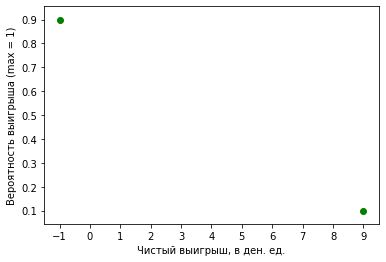

In [9]:
### Интерпретируем условия задачи
### Вероятность успеха = 1/10
### В случае успеха исход (чистый выигрыш) равен 10-1 = 9, в случае провала -1
### Нужно построить закон распределения
### Поскольку тянет только первый участник и один раз, у нас всего два исхода

outcomes = [-1, 9]
elem_probabilities = [0.9, 0.1]

x = np.linspace(0,1,2)
plt.scatter(outcomes, elem_probabilities, color="green" )
plt.ylabel("Вероятность выигрыша (max = 1)")
plt.xlabel("Чистый выигрыш, в ден. ед.")
plt.xticks(np.arange(-1, 10, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.plot()

# Подсказка: распределение Бернулли

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

ЗАКОН РАСПРЕДЕЛЕНИЯ
Сумма 2, вероятность 0.03
Сумма 3, вероятность 0.06
Сумма 4, вероятность 0.08
Сумма 5, вероятность 0.11
Сумма 6, вероятность 0.14
Сумма 7, вероятность 0.17
Сумма 8, вероятность 0.14
Сумма 9, вероятность 0.11
Сумма 10, вероятность 0.08
Сумма 11, вероятность 0.06
Сумма 12, вероятность 0.03
ЧАСТНЫЕ СЛУЧАИ
Вероятность значения на костях меньше или равно 4: 0.17
Вероятность значения на костях больше 4 прямым путём: 0.83
Вероятность значения на костях больше 4 обратным путём: 0.83


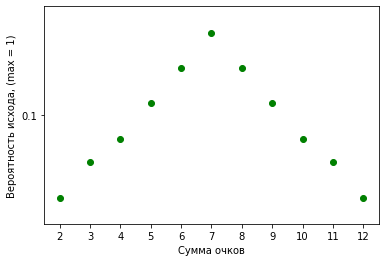

In [10]:
outcomes = ['1','2','3','4','5','6']
omega = fill_omega(outcomes, 2)
sum_outcomes = [(int(x[0]) + int(x[1])) for x in omega]
sum_outputs = sorted(list(set(sum_outcomes)))
sum_outcomes = [str(x) for x in sum_outcomes]
sum_outputs = [str(x) for x in sum_outputs]
elem_probabilities = [np.round(sum_outcomes.count(x)/len(sum_outcomes),decimals = 2) for x in sum_outputs] # считаем вероятности на основе множества элементарных событий
distrib = {sum_outputs[i]:elem_probabilities[i] for i in range(len(sum_outputs))}



print('ЗАКОН РАСПРЕДЕЛЕНИЯ')
for i in distrib:
    print('Сумма {0}, вероятность {1}'.format(i, distrib.get(i)))
print('ЧАСТНЫЕ СЛУЧАИ')

x = np.linspace(0,1,2)
plt.scatter(distrib.keys(), distrib.values(), color="green" )
plt.ylabel("Вероятность исхода, (max = 1)")
plt.xlabel("Сумма очков")
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 12, 1))
plt.plot()

outcomes_loq_4 = [x for x in sum_outcomes if int(x) <= 4]
prob_loq_4 = len(outcomes_loq_4)/len(sum_outcomes)
print('Вероятность значения на костях меньше или равно 4: %1.2f' %(prob_loq_4))

### прямая вероятность
outcomes_m_4 = [x for x in sum_outcomes if int(x) > 4]
prob_m_4 = len(outcomes_m_4)/len(sum_outcomes)
print('Вероятность значения на костях больше 4 прямым путём: %1.2f' %(prob_m_4))

### обратная вероятность
prob_m_4_alt = 1 - prob_loq_4
print('Вероятность значения на костях больше 4 обратным путём: %1.2f' %(prob_m_4_alt))


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [11]:
suits = ['D','C','H','S']
values = ['6','7','8','9','10','J','Q','K','A']
cards = [str(i)+str(j) for i in suits for j in values]

# придётся вручную задать пространство событий, т.к. в отличие от общего случая, 
# мы не можем вытянуть одну и ту же карту дважды
omega = [cards[i] + cards[j] for i in range(len(cards)) for j in range(len(cards)) if cards[i] != cards[j]]

# событие A - первая карта это 6
outcomes_A = [x for x in omega if x[1] == '6']
prob_A = len(outcomes_A)/len(omega)
# событие B - вторая карта это 7
outcomes_B = [x for x in omega if x[3] == '7']
prob_B = len(outcomes_B)/len(omega)
# событие B_A - первая карта 6, вторая 7
outcomes_B_A = [x for x in omega if (x[1] == '6') & (x[3] == '7')]
prob_B_A = len(outcomes_B_A)/len(omega)
# условная верояность: вероятность B_A разделить на вероятность A
prob_B_if_A = (prob_B_A)/(prob_A)
print('БЕЗ УЧЁТА МАСТИ')
print('Вероятность вытащить шестёрку первой картой: %1.2f' %(prob_A))
print('Вероятность вытащить шестёрку первой картой и семёрку -- второй: %1.2f' %(prob_B_A))
print('Вероятность вытащить семёрку второй картой, если первая -- шестёрка: %1.2f' %(prob_B_if_A))
print('---------------------------------------')
### теперь то же самое с ограничением на масть
# Событие C,D,C_D D_if_C совпадают с A и B c точностью до масти
outcomes_C = [x for x in omega if (x[1] == '6') & (x[0] == 'D')]
prob_C = len(outcomes_C)/len(omega)
outcomes_D = [x for x in omega if (x[3] == '7')&(x[2] == 'D')]
prob_D = len(outcomes_D)/len(omega)
outcomes_D_C = [x for x in omega if ((x[1] == '6')&(x[0] == 'D')) & ((x[3] == '7')&(x[2] == 'D'))]
prob_D_C = len(outcomes_D_C)/len(omega)
prob_D_if_C = (prob_D_C)/(prob_A)
print('С УЧЁТОМ МАСТИ')
print('Вероятность вытащить шестёрку бубей первой картой: %1.2f' %(prob_C))
print('Вероятность вытащить шестёрку бубей первой картой и семёрку бубей -- второй: %1.3f' %(prob_D_C))
print('Вероятность вытащить семёрку бубей второй картой, если первая -- шестёрка бубей: %1.2f' %(prob_D_if_C))

БЕЗ УЧЁТА МАСТИ
Вероятность вытащить шестёрку первой картой: 0.11
Вероятность вытащить шестёрку первой картой и семёрку -- второй: 0.01
Вероятность вытащить семёрку второй картой, если первая -- шестёрка: 0.11
---------------------------------------
С УЧЁТОМ МАСТИ
Вероятность вытащить шестёрку бубей первой картой: 0.03
Вероятность вытащить шестёрку бубей первой картой и семёрку бубей -- второй: 0.001
Вероятность вытащить семёрку бубей второй картой, если первая -- шестёрка бубей: 0.01


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [2]:
## Зададим функцию, которая будет извлекать шары по описанной логике

def pick_two_balls(n):
    
    omegas = []
    urn_1 = ['B','B','B','W','W'] # исходное состояние урны
    urn_2 = ['B','B','W','W','W'] # извлекли чёрный (B), добавили белый (W)
    urn_3 = ['B','B','B','W'] # извлекли белый (W), ничего не добавили
    for i in range(n):
        first_pick = np.random.choice(urn_1, size = 1, replace = False)
        choice = ''
        if first_pick == 'B':
            second_pick = np.random.choice(urn_2, size = 1, replace = False)
            choice = str(first_pick[0])+str(second_pick[0]) 
            omegas.append(choice)
        else: 
            second_pick = np.random.choice(urn_3, size = 1, replace = False)
            choice = str(first_pick[0])+str(second_pick[0])
            omegas.append(choice)
    return omegas



In [3]:
omegas = pick_two_balls(1000000) # сгенерируем выборку из 1000000 исходов

## Повторим то же самое без промежуточных вероятностей

outcomes_A = [x for x in omegas if x[0] == x[1] == 'W']
outcomes_B = [x for x in omegas if x[0] == x[1] == 'B']
prob_A_alt = len(outcomes_A)/len(omegas)
prob_B_alt = len(outcomes_B)/len(omegas)

print('Верояность получить два белых шара без промежуточных вероятностей: %1.2f' %prob_A_alt)
print('Верояность получить два чёрных шара без промежуточных вероятностей: %1.2f' %prob_B_alt)

Верояность получить два белых шара без промежуточных вероятностей: 0.10
Верояность получить два чёрных шара без промежуточных вероятностей: 0.24
